## Credit Card Data Customer Segmentation

In this project, the goal is to segment the company's customers into different groups to apply different business strategies for each type of customer. We will use the K-means algorithm for this task. The K-means algorithm is a unsupervised machine learning algo.

### Step 1: Importing the necessary libraries and reading the dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = pd.read_csv('customer_segmentation.csv')


### Step 2: Familiarizing ourselves with the dataset

In [3]:
data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
data.shape

(10127, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [24]:
data.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [8]:
#Data explore category variables
for col in ['gender', 'education_level', 'marital_status']:
    print(data[col].value_counts(), end='\n\n')

gender
F    5358
M    4769
Name: count, dtype: int64

education_level
Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: count, dtype: int64

marital_status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



## Dataset Information

- Dataset size: The dataset contains 10,127 rows (observations) and 14 columns (variables/features).

- Columns: The dataset has the following columns:
  - 'customer_id': unique identifier for each customer.
  - 'age': customer age in years.
  - 'gender': customer gender (M or F).
  - 'dependent_count': number of dependents of each customer.
  - 'education_level': level of education ("High School", "Graduate", etc.).
  - 'marital_status': marital status ("Single", "Married", etc.).
  - 'estimated_income': the estimated income for the customer projected by the data science team.
  - 'months_on_book': time as a customer in months.
  - 'total_relationship_count': number of times the customer contacted the company.
  - 'months_inactive_12_mon': number of months the customer did not use the credit card in the last 12 months.
  - 'credit_limit': customer's credit limit.
  - 'total_trans_amount': the overall amount of money spent on the card by the customer.
  - 'total_trans_count': the overall number of times the customer used the card.
  - 'avg_utilization_ratio': daily average utilization ratio.

- Data types: The data types of the columns are as follows:
  - 'customer_id': int64
  - 'age': int64
  - 'gender': object (categorical)
  - 'dependent_count': int64
  - 'education_level': object (categorical)
  - 'marital_status': object (categorical)
  - 'estimated_income': int64
  - 'months_on_book': int64
  - 'total_relationship_count': int64
  - 'months_inactive_12_mon': int64
  - 'credit_limit': float64
  - 'total_trans_amount': int64
  - 'total_trans_count': int64
  - 'avg_utilization_ratio': float64

- Categorical variables: There are several categorical variables in the dataset, namely 'gender', 'education_level', and 'marital_status'. We can deal with these categorical variables by either one-hot encoding them or using label encoding, depending on the requirements of the analysis or the machine learning model.

- Missing values: There are no missing values in the dataset. All the columns have 0 missing values.

With this information, we have a good understanding of the dataset's size, column names, data types, presence of categorical variables, and missing values, which allows us to proceed with the subsequent steps of the project.



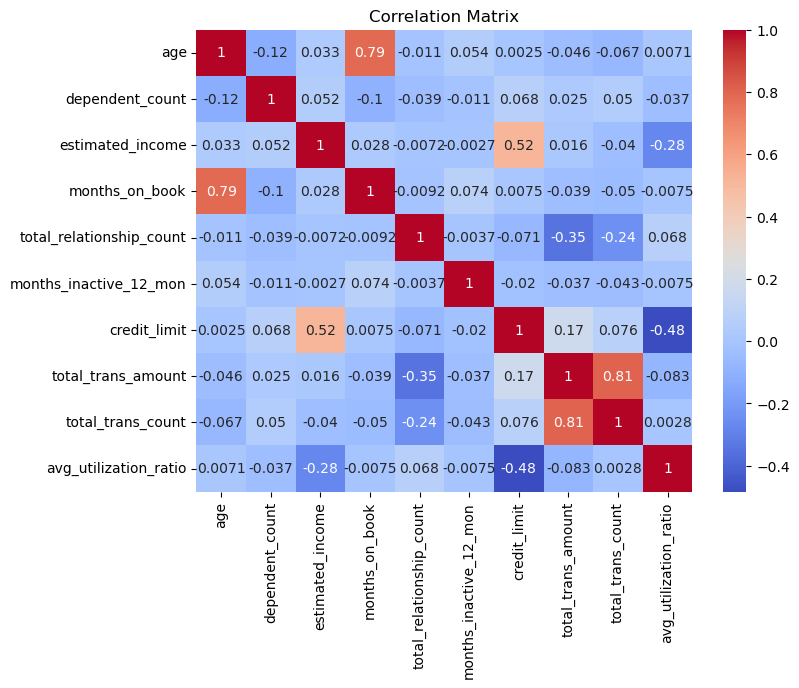

In [15]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
numeric_data = numeric_data.drop('customer_id', axis=1)
# Calculate the correlation matrix
correlation_matrix =numeric_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Correlation Analysis

The correlation matrix provides insights into the relationships between the numerical variables in the dataset. Here are some observations:

- Age and months on book have a strong positive correlation of 0.789, indicating that older customers tend to have been customers for a longer duration.

- Credit limit and estimated income have a moderate positive correlation of 0.516, suggesting that customers with higher estimated incomes tend to have higher credit limits.

- Total transaction amount and total transaction count have a strong positive correlation of 0.807, indicating that customers who make more transactions tend to have higher transaction amounts.

- Credit limit and average utilization ratio have a moderate negative correlation of -0.483, suggesting that customers with higher credit limits tend to have lower average utilization ratios.

- Total relationship count and total transaction amount have a negative correlation of -0.347, indicating that customers with more relationships with the company tend to have lower transaction amounts.

It's important to note that correlation does not imply causation, and further analysis is required to understand the underlying relationships between the variables.


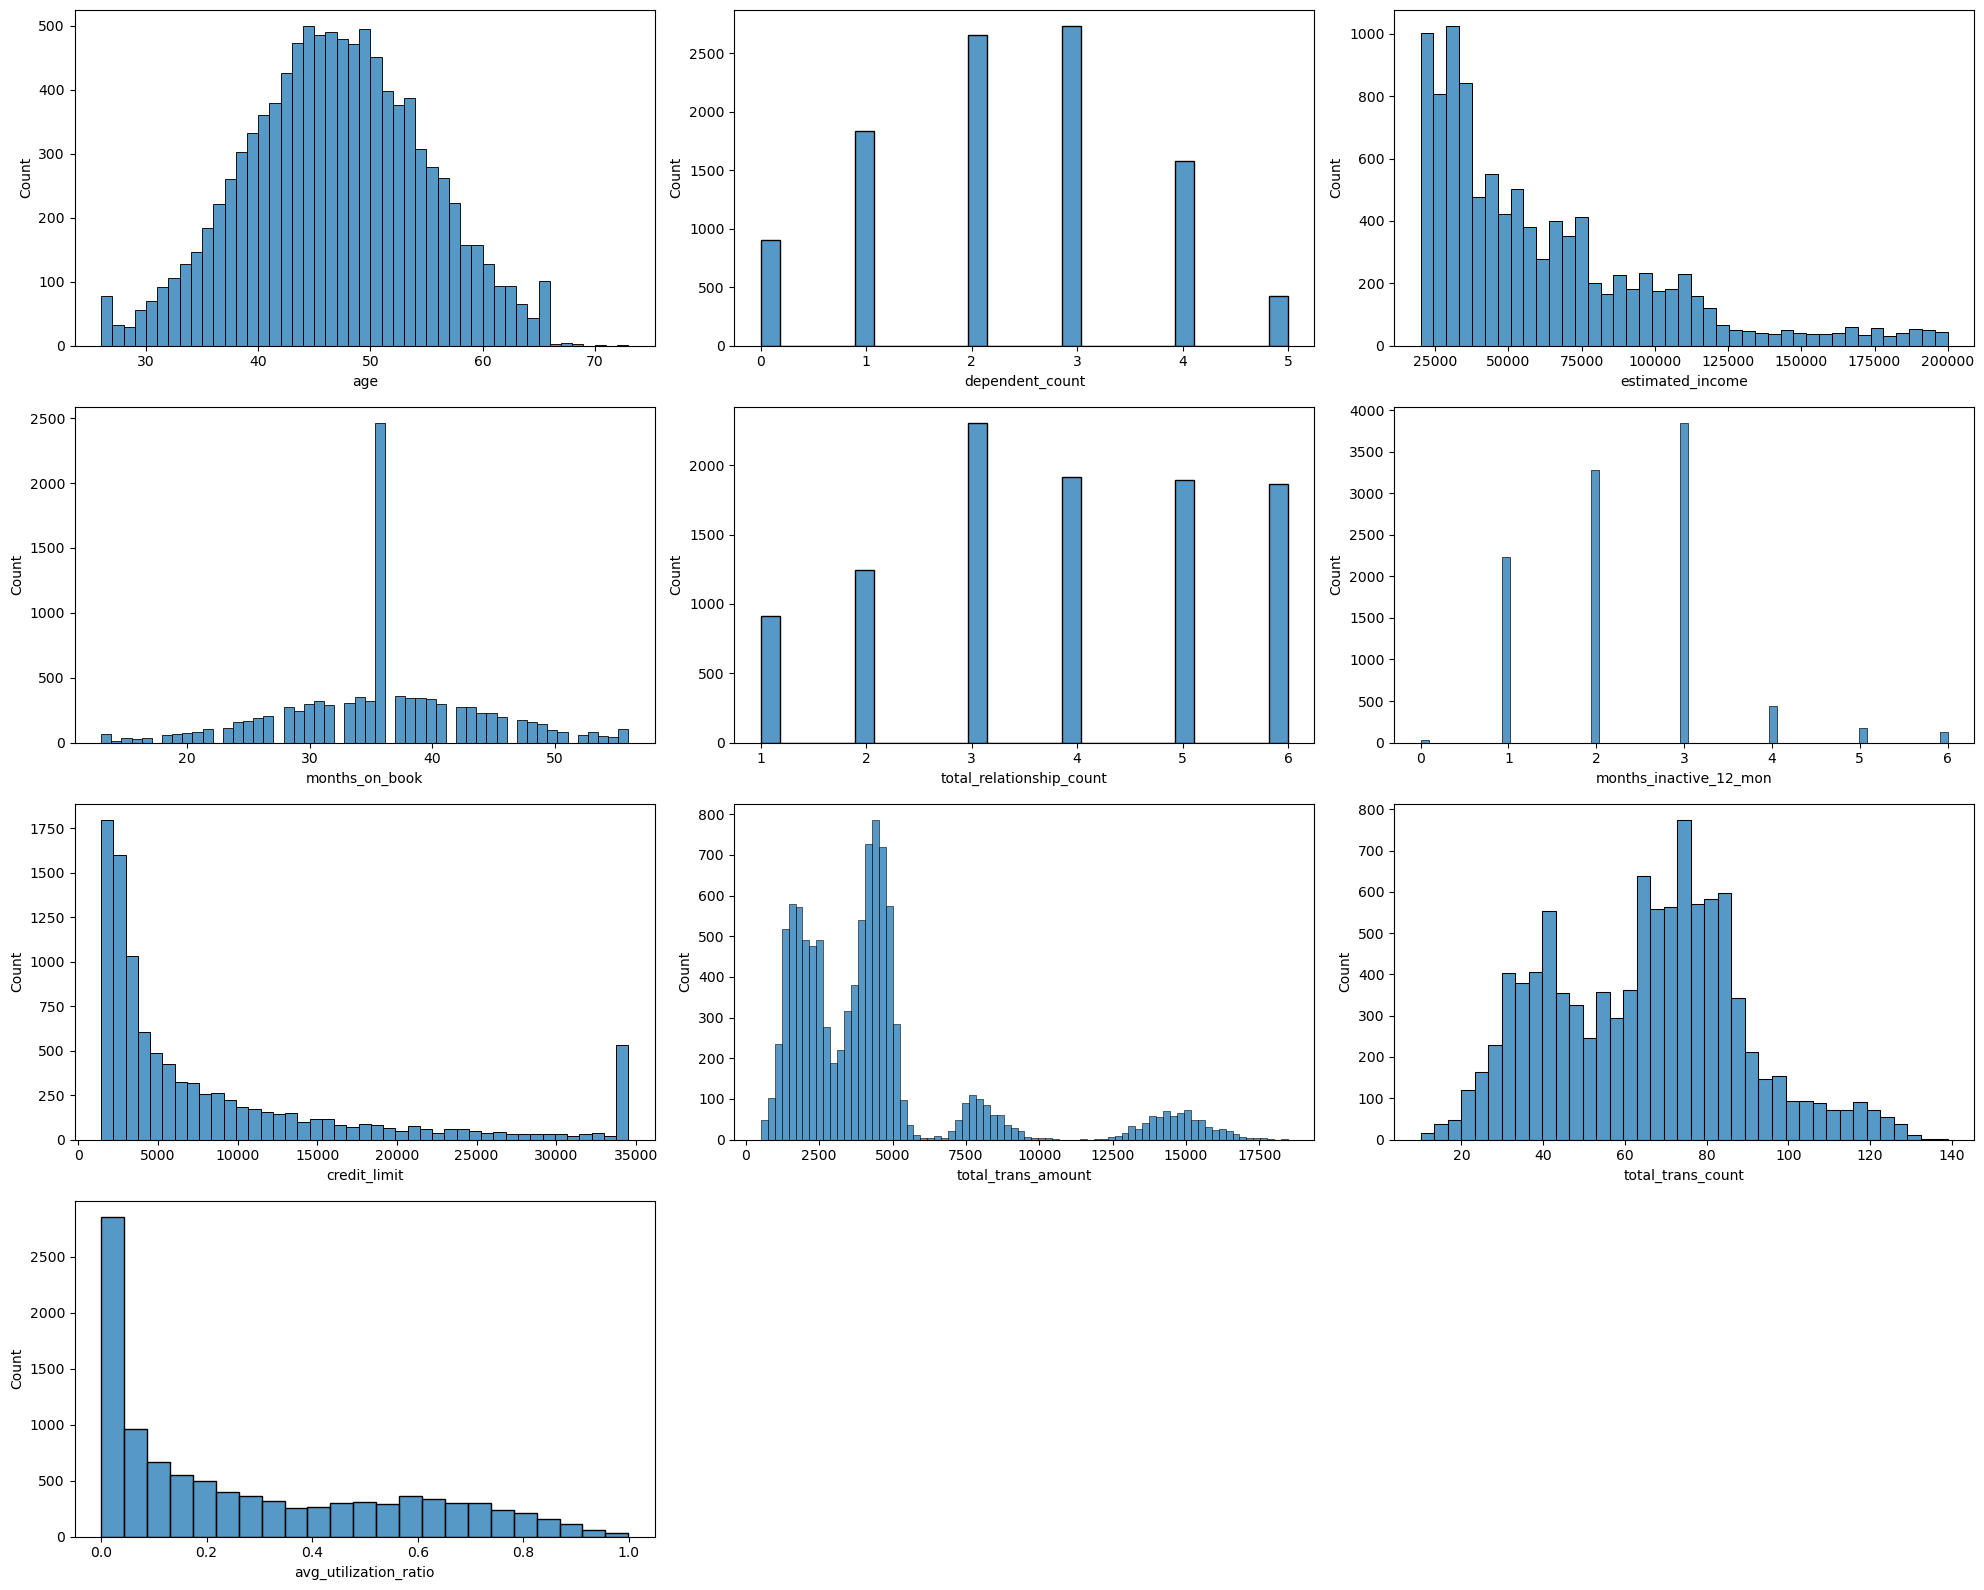

In [20]:
# Select numeric columns for plotting
numeric_columns = data.select_dtypes(include=[np.number])
numeric_columns = numeric_columns.drop('customer_id', axis=1)

# Calculate the number of rows and columns needed for the subplot grid
n_columns = len(numeric_columns.columns)
n_rows = (n_columns + 2) // 3  # Calculate the number of rows needed
n_cols = 3  # Keep the number of columns fixed at 3

# Plot the distributions
plt.figure(figsize=(20, n_rows * 4))  # Adjust the figure size based on the number of rows
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(data[column], kde=False) #KDE stands for Kernel Density Estimation.  kde=True will overlay a smooth curve on top of the data points to represent the density of the data. 
    
plt.tight_layout()
plt.show()

Regarding distributions, we have a couple of them closer to a normal distribution, but most of them are skewed.

In [21]:
# Create a copy of the original DataFrame
data_modif = data.copy()

# Replace the values in the gender column with 1 for "M" and 0 for "F"
data_modif['gender'] = data_modif['gender'].map({'M': 1, 'F': 0})

# Replace the values in the education_level column
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}

data_modif['education_level'] = data_modif['education_level'].map(education_mapping)


After executing the above code, the `data_modif` DataFrame will contain the modified values for the gender and education_level columns. The gender column will have 1 for "M" and 0 for "F", and the education_level column will have the corresponding numeric values based on the mapping defined in the `education_mapping` dictionary.

Unfortunately, we can't do the same for this `marital_status` column as there is no level of magnitude between "Single", "Married" or "Divorced", for example. We can't say that any of them is higher or better than the others. Therefore, we'll use [one-hot-encoding](https://www.shiksha.com/online-courses/articles/handling-categorical-variables-with-one-hot-encoding/#:~:text=One%2DHot%20encoding%20technique%20is,containing%20either%200%20or%201.) to create dummy variables from this column and then drop the original variable.


In [22]:
# Use one-hot encoding to create dummy variables for the marital_status column
marital_status_dummies = pd.get_dummies(data_modif['marital_status'], prefix='marital', drop_first=True)

# Combine the new DataFrame with the original
data_modif = pd.concat([data_modif, marital_status_dummies], axis=1)

# Drop the original marital_status column
data_modif = data_modif.drop('marital_status', axis=1)


Now, let's deal with the scaled data across the DataFrame. We have different scales for columns like estimated_income and dependent_count. To ensure all the features are on the same scale, we'll use the StandardScaler from scikit-learn.

1. Create a new DataFrame without the column customer_id.
2. Instantiate an object from the scikit-learn's StandardScaler() class and fit it to the new DataFrame.
3. Use the transform method to scale the data. Assign it to a different variable and print it.
4. Convert the scaled data back to a DataFrame using pd.DataFrame().

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame without the customer_id column
data_scaled = data_modif.drop('customer_id', axis=1)

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(data_scaled)

# Scale the data using the transform method
data_scaled = scaler.transform(data_scaled)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_modif.columns[1:])

# Print the scaled data
print(data_scaled)


            age    gender  dependent_count  education_level  estimated_income  \
0     -0.165406  1.059956         0.503368        -0.752211          0.175810   
1      0.333570 -0.943436         2.043199         0.662787         -0.967166   
2      0.583058  1.059956         0.503368         0.662787          0.785397   
3     -0.789126 -0.943436         1.273283        -0.752211         -0.636973   
4     -0.789126  1.059956         0.503368        -1.459710          0.074212   
...         ...       ...              ...              ...               ...   
10122  0.458314  1.059956        -0.266547         0.662787         -0.281380   
10123 -0.664382  1.059956        -0.266547         0.662787         -0.560775   
10124 -0.290150 -0.943436        -1.036462        -0.752211         -0.738571   
10125 -2.036565  1.059956        -0.266547         0.662787         -0.382978   
10126 -0.414894 -0.943436        -0.266547         0.662787         -0.662372   

       months_on_book  tota

Now our dataset is ready for machine learning. The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric.

We'll have to create several models and compute the inertia from each of them. Then, we'll be able to plot the Elbow Curve and decide the number of clusters we'll use to segment the customers. Once we do all that, we can perform the real clusterization.

1. Create an empty list to store the inertia from every model.
2. Use a for loop to iterate over different numbers of clusters, such as ranging from 2 to 10.
3. For each number of clusters (K) in the loop:
   - Instantiate a KMeans object and set the number of clusters (n_clusters) to K.
   - Use the `fit_predict()` method to create the clusters based on the scaled data.
   - Append the `inertia_` attribute of the model to the empty list.
4. Use the list of inertia values to plot the Elbow Curve. The Elbow Curve is a plot of the number of clusters (K) against the inertia. It helps us visualize the trade-off between the number of clusters and the distortion within each cluster. The "elbow" point in the curve indicates the optimal number of clusters where adding more clusters does not significantly improve the inertia.
5. Based on the shape of the Elbow Curve, decide the number of clusters to use for segmenting the customers. This decision should be made by identifying the point in the curve where adding more clusters does not lead to a substantial decrease in inertia.
6. Instantiate a new KMeans object with the decided number of clusters as K.
7. Use the `fit_predict()` method on the scaled data to create the final clusters.
8. Print the outcome, which represents the cluster labels assigned to each data point.


[For more information on importance and definition of K-Means: Inertia](https://www.codecademy.com/learn/dspath-unsupervised/modules/dspath-clustering/cheatsheet)

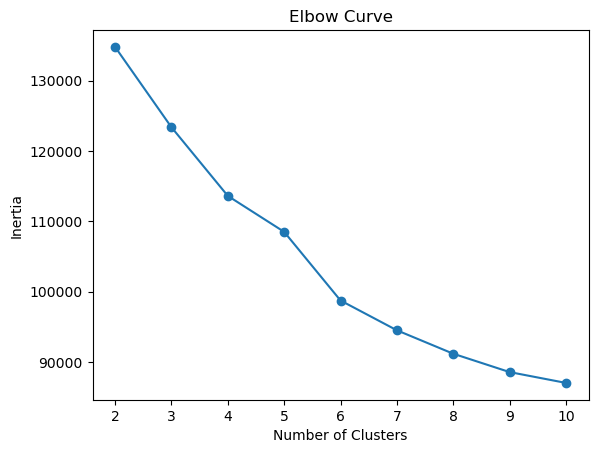

Number of Clusters: 6
[1 3 1 ... 5 2 5]


In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Empty list to store inertia
inertia = []

# Loop through different numbers of clusters
for k in range(2, 11):
    # Instantiate KMeans with n_clusters=k
    kmeans = KMeans(n_clusters=k)
    
    # Fit the model and create clusters
    clusters = kmeans.fit_predict(data_scaled)
    
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Based on the elbow curve, decide the number of clusters
num_clusters = 6
print(f"Number of Clusters: {num_clusters}")

# Instantiate KMeans with the decided number of clusters
kmeans_final = KMeans(n_clusters=num_clusters)

# Fit the model and create clusters
final_clusters = kmeans_final.fit_predict(data_scaled)

# Print the outcome
print(final_clusters)


Now it's time to analyze the results of the clustering algorithm and understand the characteristics of each cluster. By examining the variables used in the clustering and their distribution within each cluster, we can gain insights into the different customer segments and make business suggestions accordingly.


Decided to use 9 clusters and let the machine cluster them based on the k-means algorithm.

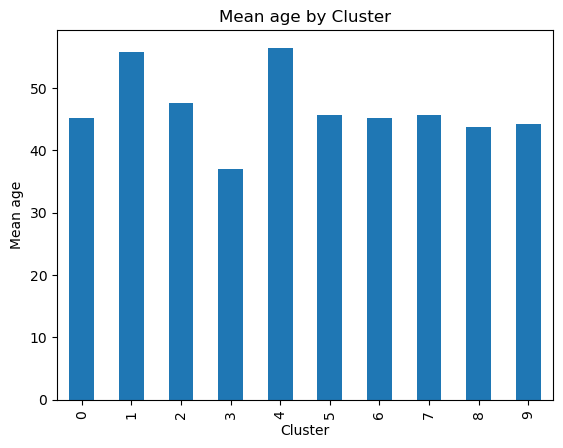

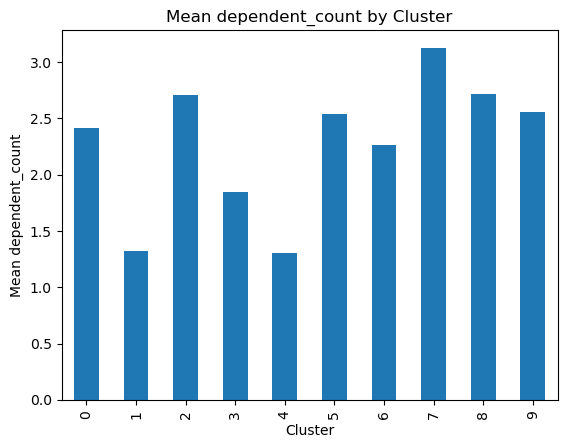

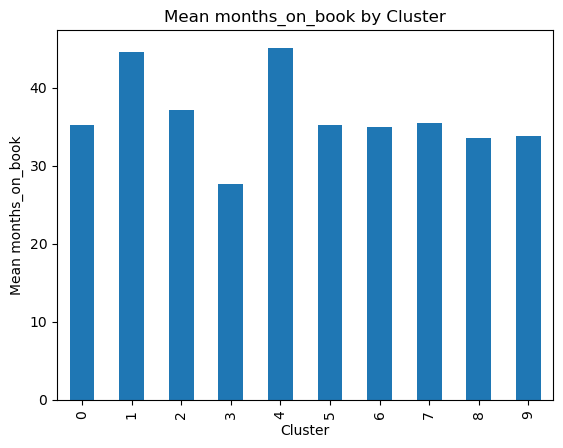

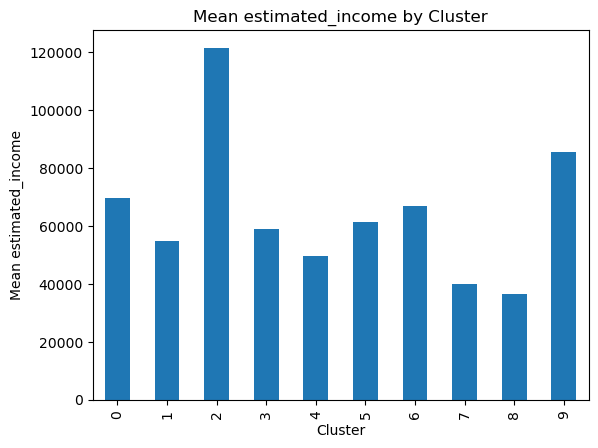

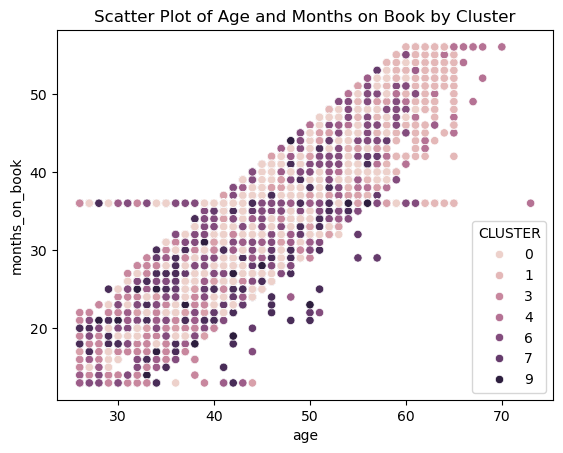

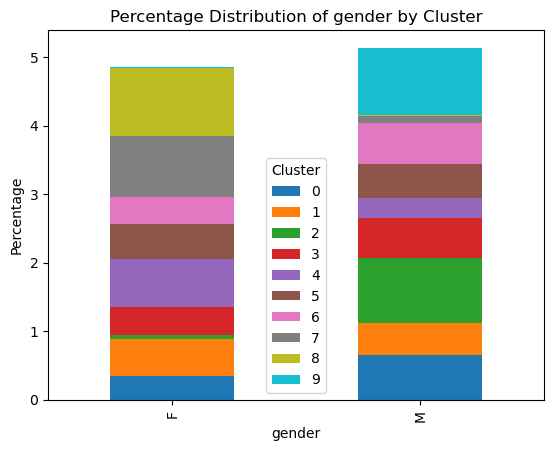

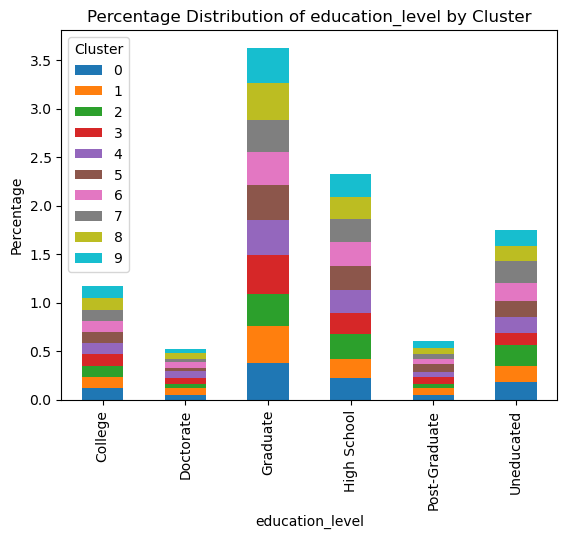

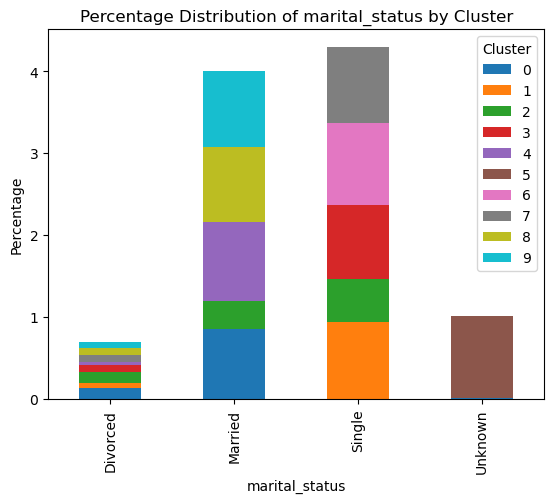

In [28]:
# Add CLUSTER column to the original customers DataFrame
data['CLUSTER'] = kmeans.labels_

# Group numeric variables by CLUSTER and plot bar charts
numeric_vars = ['age', 'dependent_count', 'months_on_book', 'estimated_income']
for var in numeric_vars:
    grouped = data.groupby('CLUSTER')[var].mean()
    grouped.plot(kind='bar', title=f'Mean {var} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {var}')
    plt.show()

# Create scatter plot for highly correlated variables
correlated_vars = ['age', 'months_on_book']
sns.scatterplot(data=data, x=correlated_vars[0], y=correlated_vars[1], hue='CLUSTER')
plt.title('Scatter Plot of Age and Months on Book by Cluster')
plt.xlabel(correlated_vars[0])
plt.ylabel(correlated_vars[1])
plt.show()

# Calculate percentage distribution of categorical variables per cluster
categorical_vars = ['gender', 'education_level', 'marital_status']
for var in categorical_vars:
    crosstab = pd.crosstab(data[var], data['CLUSTER'], normalize='columns')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Percentage Distribution of {var} by Cluster')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Cluster')
    plt.show()


**Cluster 0:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $61,352. The majority of customers in this cluster are married with some divorced.
- Differences from other clusters: Cluster 0 is characterized the majority of them being married with some divorced. and a relatively moderate income level.
- Business suggestion: Since the majority of customers in this cluster have an unknown marital status, marketing campaigns can focus on offering comprehensive financial solutions for families. This can include family savings plans, educational investment options, and tailored services for married couples.

**Cluster 1:**
- Main Characteristics: Customers in this cluster have an average age of around 56 years. They have a low number of dependents and an estimated income of approximately $48,626. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 1 is characterized by older customers with a lower number of dependents and a lower income level compared to other clusters.
- Business suggestion: Recognizing the lower/moderate income level and single status in this cluster, marketing strategies can focus on offering affordable financial solutions, savings and investment options, and tailored offers to address the specific needs and aspirations of single individuals.

**Cluster 2:**
- Main Characteristics: Customers in this cluster have an average age of around 46. They have a relatively little bit higher than average dependents and an estimated income of approximately $120,000. The majority of customers in this cluster are male.
- Differences from other clusters: Cluster 2 is characterized by middle age males with high income.
- Business suggestion: With the higher income level and larger number of dependents, this cluster represents an opportunity for offering comprehensive financial planning and investment services. Targeted marketing efforts can focus on providing solutions for the financial well-being of males who may be more risk adverse and prefer exclusivity in the relationship with their bank or money manager.

**Cluster 3:**
- Main Characteristics: Customers in this cluster have an average age of around mid 30s.  They have a avgof dependents and an estimated income of approximately shy of $60k. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 3 is characterized by customers with a who are single and making around the average in the income level.
- Business suggestion: focus on single individuals, marketing campaigns can target lifestyle-oriented financial products and services. Providing personalized financial planning solutions and investment opportunities can be attractive to this segment.

**Cluster 4:**
- Main Characteristics: Customers in this cluster have an average age of around 55+ years. They have a low number of dependents and an estimated income of approximately $50k. The majority of customers in this cluster are married and are female.
- Differences from other clusters: Cluster 4 is characterized by customers with a relatively lower income level compared to other clusters.
- Business suggestion: Marketing efforts can focus on offering products and services that cater to the specific needs of individuals with a lower number of dependents. This can include personalized financial planning, retirement solutions, and insurance options tailored for smaller households.

**Cluster 5:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a moderate number of dependents and an estimated income of approximately $60k. The majority of customers in this cluster are unknown marital status.
- Differences from other clusters: Cluster 5 is characterized by customers who are unknown marital status..
- Business suggestion: Unknown may be worth uncovering more about these indivudals before investing in a campaign of them.

**Cluster 6:**
- Main Characteristics: Customers in this cluster have an average age of around 44 years. They have a moderate number of dependents and an estimated income of approximately $36,973. The majority of customers in this cluster are single.
- Differences from other clusters: Cluster 6 is characterized by customers with a relatively lower income level and a higher proportion of single individuals.
- Business suggestion: Recognizing the lower income level and single status in this cluster, marketing strategies can focus on offering affordable financial solutions, savings and investment options, and tailored offers to address the specific needs and aspirations of single individuals.

**Cluster 7:**
- Main Characteristics: Customers in this cluster have an average age of around 46 years. They have a moderate number of dependents and an estimated income of approximately $91,324. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 7 is characterized by customers with a relatively higher income level compared to other clusters.
- Business suggestion: With the higher income level and the majority being married individuals, marketing campaigns can focus on offering comprehensive financial solutions for families. This can include family savings plans, educational investment options, and tailored services for married couples.

**Cluster 8:**
- Main Characteristics: Customers in this cluster have an average age of around 45 years. They have a high number of dependents and an estimated income of approximately $67,001. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 8 is characterized by customers with a high number of dependents and a moderate income level.
- Business suggestion: Marketing efforts can focus on offering products and services that cater to the specific needs of individuals with a high number of dependents. This can include personalized financial planning, retirement solutions, and insurance options tailored for higher households, maybe college 403b plans or saving for auto loans.

**Cluster 9:**
- Main Characteristics: Customers in this cluster have an average age of around low to mid 40 years. They have an estimated income of approximately $80,000. The majority of customers in this cluster are married.
- Differences from other clusters: Cluster 9 is characterized by middle age customers who are married nad have good incomes upper middle class types.
- Business suggestion: With the focus on middle age customers and married individuals, marketing campaigns can target retirement planning, family investment solutions, and tailored financial products for the specific needs and aspirations of this segment.

